In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv('population_by_age_group.csv')

In [5]:
df.head()

,Country,Total,65+,25-64 years,15-24 years,5-14 years,0-4 years
0,Afghanistan,40099460,964016,12995277,8727160,10922454,6490554
1,Albania,2854710,463442,1527360,399113,323402,141393
2,Algeria,44177964,2731079,21871300,6007614,8697129,4870841
3,American Samoa,45056,3088,22433,7141,8365,4029
4,Andorra,79057,11499,48651,8570,7797,2540


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      235 non-null    object
 1   Total        235 non-null    int64 
 2   65+          235 non-null    int64 
 3   25-64 years  235 non-null    int64 
 4   15-24 years  235 non-null    int64 
 5   5-14 years   235 non-null    int64 
 6   0-4 years    235 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.0+ KB


In [7]:
df.columns

Index(['Country', 'Total', '65+', '25-64 years', '15-24 years', '5-14 years',
       '0-4 years'],
      dtype='object')

In [8]:
df.shape

(235, 7)

In [9]:
df.isnull().sum()

Country        0
Total          0
65+            0
25-64 years    0
15-24 years    0
5-14 years     0
0-4 years      0
dtype: int64

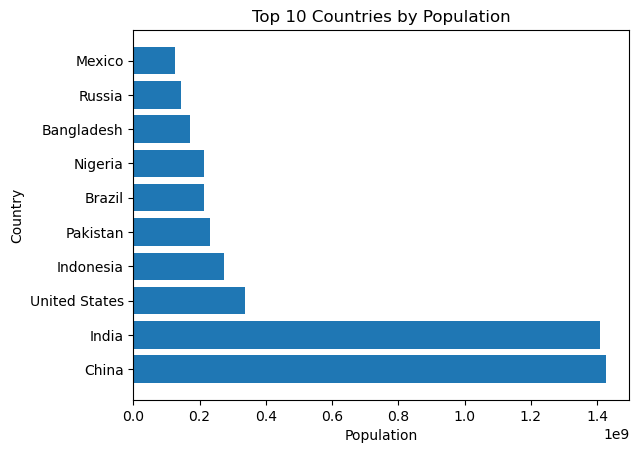

In [10]:
sorted_data = df.sort_values('Total', ascending=False)
top_10_countries = sorted_data.head(10)

plt.barh(top_10_countries['Country'], top_10_countries['Total'])

plt.title("Top 10 Countries by Population")
plt.xlabel("Population")
plt.ylabel("Country")

plt.show()

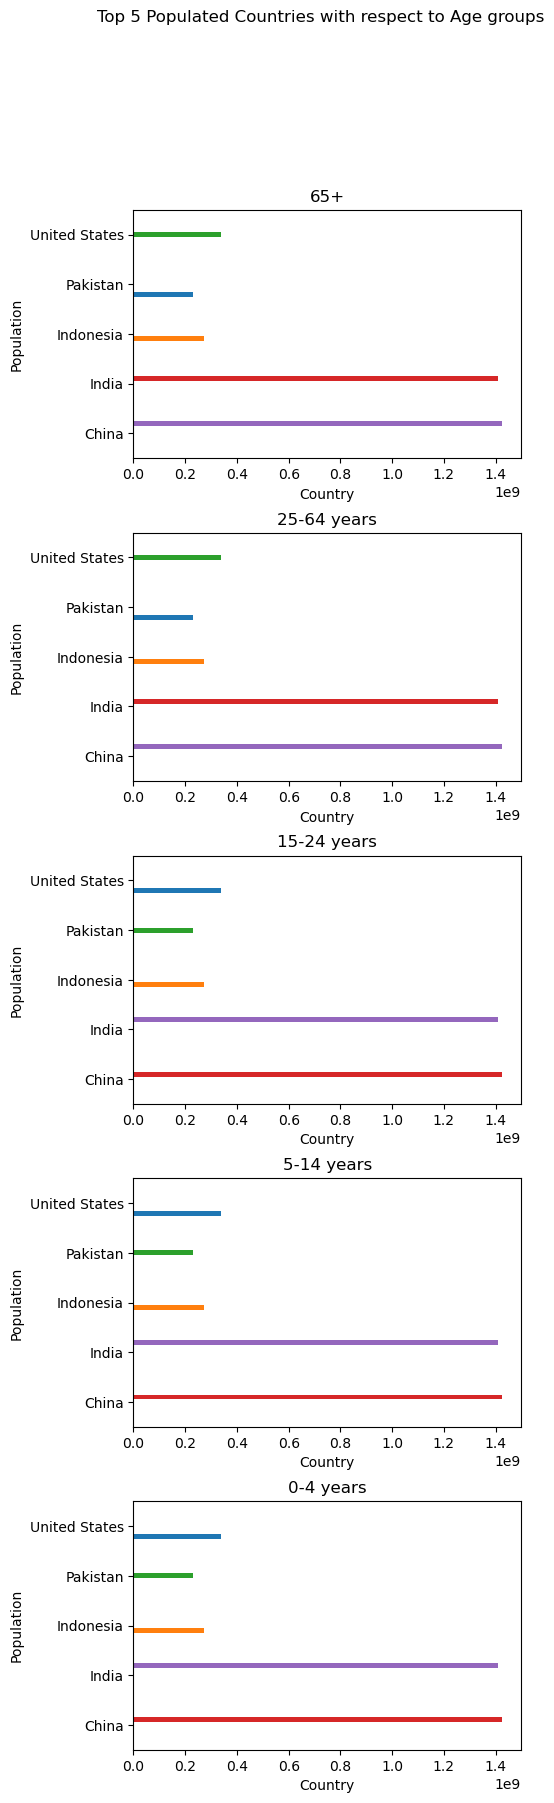

In [12]:
sorted_data = df.sort_values('Total', ascending=False)

top_5_countries = sorted_data.head(5)

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 20))

for i, age_group in enumerate(['65+', '25-64 years', '15-24 years', '5-14 years', '0-4 years']):
    top_5_countries.loc[:, age_group] = top_5_countries[age_group].astype('category')

    pivot_data = top_5_countries.pivot(index='Country', columns=age_group, values='Total')

    pivot_data.plot(kind='barh', ax=axs[i], legend=False)

    axs[i].set_title(age_group)
    axs[i].set_xlabel('Country')
    axs[i].set_ylabel('Population')

fig.suptitle('Top 5 Populated Countries with respect to Age groups')

# Add a gap between the subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# Display the subplot
plt.show()